# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils import data

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm_notebook

# %matplotlib inline
%matplotlib notebook

# Load data

In [2]:
# define path to dataset

# path to file in guanaco
# pathToFile = "/home/shared/astro/PLAsTiCC/"

# path to file in local 
pathToFile = "/home/leo/Desktop/thesis/work/plasticc_dataset/"

In [3]:
# train path
trainPath = "plasticc_train_lightcurves.csv"
trainMetaPath = "plasticc_train_metadata.csv"

# load in df
df1 = pd.read_csv(pathToFile + trainPath)
mdf1 = pd.read_csv(pathToFile + trainMetaPath)

# display head
display(df1.head())
display(mdf1.head())

# merge dataframes
# merging data using object_id 
mdf1 = df1.merge(mdf1, on = "object_id")

# display merged data
display(mdf1.head())

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,59750.4229,2,-544.810303,3.622952,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,615,59750.4306,1,-816.434326,5.553370,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
2,615,59750.4383,3,-471.385529,3.801213,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
3,615,59750.4450,4,-388.984985,11.395031,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
4,615,59752.4070,2,-681.858887,4.041204,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0


In [4]:
# printing dataframe shapes
print("Shape of data to work: ", mdf1.shape)
print("Unique targets: ", mdf1.true_target.unique().shape[0])
print("targets: ", mdf1.true_target.unique())

Shape of data to work:  (1421705, 31)
Unique targets:  14
targets:  [92 88 42 90 65 16 67 95 62 15 52  6 64 53]


# Plotting one light curve
To check the data

<IPython.core.display.Javascript object>


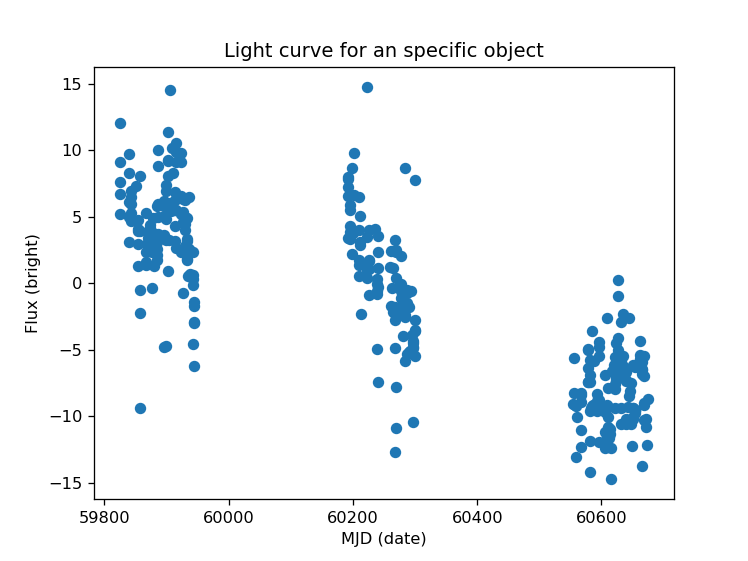

Text(0.5, 1.0, 'Light curve for an specific object')

In [5]:
# get one light curve
oneLightCurve = mdf1[mdf1["object_id"] == 713]

# display plot
fig, ax = plt.subplots()
ax.scatter(oneLightCurve["mjd"], oneLightCurve["flux"])
ax.set_xlabel("MJD (date)")
ax.set_ylabel("Flux (bright)")
ax.set_title("Light curve for an specific object")

# Formating dataset to work
- Change name to dataframe (for simplicity)

- Select useful variables

In [8]:
# change name to dataframe
lightCurves = mdf1

# for take only a part of classes and remove anothers ones
# lightCurves = lightCurves.loc[lightCurves["true_target"].isin(classesToAnalyze)]

# filter by passband
# for simplicity selecting one passband
lightCurves = lightCurves[lightCurves.passband == 1]


# getting only useful features
lightCurves = lightCurves[["object_id", "mjd", "flux", "flux_err", "true_target"]]
lightCurves = lightCurves.rename(columns={"true_target": "target"})
# display(lightCurves.head())


# printing information
display(lightCurves.head())
print("data shape: ", lightCurves.shape)
print("original objects ids: ", lightCurves.object_id.unique().shape)
# print("original classes: ", lightCurves.true_target.unique().shape)
print("original classes: ", lightCurves.target.unique().shape)

,object_id,mjd,flux,flux_err,target
1,615,59750.4306,-816.434326,5.553370,92
5,615,59752.4147,-1061.457031,6.472994,92
10,615,59767.3045,-815.188599,5.293019,92
15,615,59770.2256,-820.042786,5.875329,92
20,615,59779.3265,-921.002502,6.306800,92


data shape:  (176499, 5)
original objects ids:  (7848,)
original classes:  (14,)


# Standarizing data

In [9]:
# standarizing variables
# this returns a numpy array
stdLightCurves = StandardScaler().fit_transform(lightCurves.loc[:, ["flux", "flux_err"]])
display(stdLightCurves.shape)

# create new array wth standarized data
lightCurvesStd = lightCurves
# overwrite data
lightCurvesStd["flux"] = stdLightCurves[:, 0]
lightCurvesStd["flux_err"] = stdLightCurves[:, 1]

#printing dataset
display(lightCurvesStd.head())

(176499, 2)

,object_id,mjd,flux,flux_err,target
1,615,59750.4306,-0.766029,-0.011520,92
5,615,59752.4147,-0.990146,-0.006472,92
10,615,59767.3045,-0.764889,-0.012950,92
15,615,59770.2256,-0.769329,-0.009753,92
20,615,59779.3265,-0.861675,-0.007384,92


# Feature extraction with Variatonal Autoencoder 

# Formating data to train VAE

# Defining data to use

In [10]:
# Create dataset
# selecting columns to use
variableIndexStart = 2
variableIndexEnd = -2

# define data to use
dataToUse = lightCurvesStd.iloc[:, variableIndexStart:variableIndexEnd].values

# display data shape
display(dataToUse.shape)

(176499, 1)

# Transform dataset to light curves dataset 
Because all the light curves have different lenghts, I am going to take a specific number of sample for each light curve

In [11]:
#  check the different lenghts of all light curves
lightCurvesLenght = np.zeros(shape = (lightCurvesStd.object_id.unique().shape[0],))

# transform ethe data set into array: [light curve,]
for i, objectId in enumerate(lightCurvesStd.object_id.unique()):
    
#     print(objectId)
    lightCurvesLenght[i] = lightCurvesStd[lightCurvesStd.object_id == objectId].shape[0]

<IPython.core.display.Javascript object>


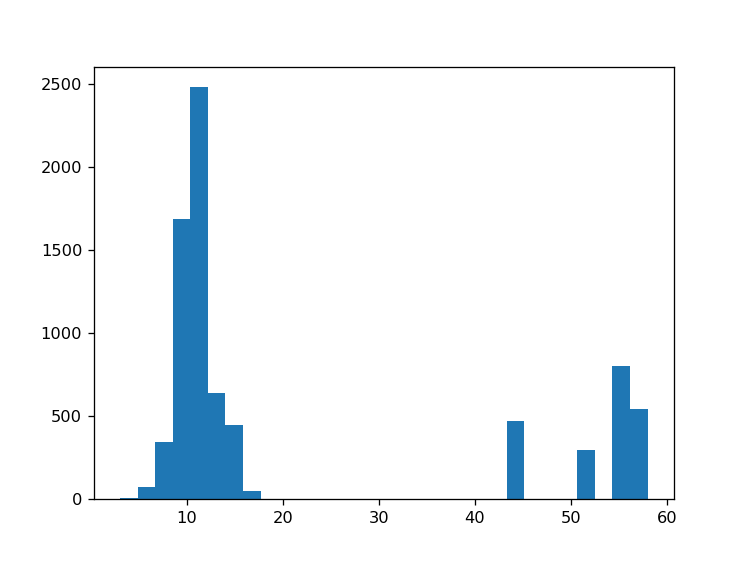

(array([1.000e+01, 7.600e+01, 3.440e+02, 1.687e+03, 2.479e+03, 6.390e+02,
        4.490e+02, 4.700e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.700e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 2.990e+02, 0.000e+00, 8.010e+02, 5.460e+02]),
 array([ 3.        ,  4.83333333,  6.66666667,  8.5       , 10.33333333,
        12.16666667, 14.        , 15.83333333, 17.66666667, 19.5       ,
        21.33333333, 23.16666667, 25.        , 26.83333333, 28.66666667,
        30.5       , 32.33333333, 34.16666667, 36.        , 37.83333333,
        39.66666667, 41.5       , 43.33333333, 45.16666667, 47.        ,
        48.83333333, 50.66666667, 52.5       , 54.33333333, 56.16666667,
        58.        ]),
 <a list of 30 Patch objects>)

In [12]:
plt.figure()
plt.hist(lightCurvesLenght, bins = 30)

In [19]:
# I am going to select a fixed lenght for each light curve of specific points for each light curve

# selecting the fixed lenght for each light curve
count = 0
lengthToSelect = 50

for i, objectId in enumerate(lightCurvesStd.object_id.unique()):
    if lightCurvesStd[lightCurvesStd.object_id == objectId].shape[0] > lengthToSelect:
        count += 1
print(count)

1646


In [20]:
# checking df es working correctly
lightCurvesStd.head()

,object_id,mjd,flux,flux_err,target
1,615,59750.4306,-0.766029,-0.011520,92
5,615,59752.4147,-0.990146,-0.006472,92
10,615,59767.3045,-0.764889,-0.012950,92
15,615,59770.2256,-0.769329,-0.009753,92
20,615,59779.3265,-0.861675,-0.007384,92


In [21]:
# build dataset with new fixed lenght of each llight curve
lightCurvesById = np.zeros(shape = (count, lengthToSelect))
i_ = 0

for i, objectId in enumerate(lightCurvesStd.object_id.unique()):
    
    if lightCurvesStd[lightCurvesStd.object_id == objectId].shape[0] > lengthToSelect:
        
        lightCurvesById[i_, :] = lightCurvesStd[lightCurvesStd.object_id == objectId]["flux"][0:lengthToSelect]
        
        i_ += 1
        
lightCurvesById.shape

(1646, 50)

Now the dataset is an array where each row is a time serie of fixed length

In [22]:
# check visualizelly the correctnes of array
# display(lightCurvesById)
plt.figure()
plt.plot(lightCurvesById[10])
plt.show()

<IPython.core.display.Javascript object>

# Data to tensor

In [23]:
# variables
torchData = torch.from_numpy(lightCurvesById).float()

# torchData.shape

# targets
# target is the same as 
# torchTargets = torch.tensor(lightCurvesStd.iloc[:, -1].values).float()

# creating dataset
dataset = data.TensorDataset(torchData)

# Spliting data (train/test)

In [24]:
# Spliting the data

# selecting train splitting
train_size = int(0.8 * lightCurvesById.shape[0])

# getting test splitting
test_size = lightCurvesById.shape[0] - train_size

# spliting the torch dataset
trainDataset, testDataset = torch.utils.data.random_split(dataset, [train_size, test_size])


# Create data loader (minibatches)

# train loader
trainLoader = data.DataLoader(trainDataset, batch_size=256)

# test loader
testLoader = data.DataLoader(testDataset)

## Define autoencoder structure
To start with the work, It is going to build a very basic Autoencoder

In [25]:
# Buiding autoencoder

# Assuming this has a normal distrubtion in the latent part

# encoder
class Encoder(torch.nn.Module):
    
    # init method
    def __init__(self, latent_dim, hidden_dim, input_dim):

        super(Encoder, self).__init__()
        
        # linear layer
        self.hidden1 = torch.nn.Linear(input_dim, hidden_dim)
        
        # linear layer
        self.hidden2 = torch.nn.Linear(hidden_dim, hidden_dim)
        
        # mu
        self.mu = torch.nn.Linear(hidden_dim, latent_dim)
        
        # sigma
        self.sigma = torch.nn.Linear(hidden_dim, latent_dim)
        
        # activation function
        self.activation = torch.nn.Softplus()

    # forward method
    def forward(self, x):
        
        # x -> hidden1 -> activation
        output = self.activation(self.hidden1(x))
        
        # get mu
        mu = self.mu(output)
        
        # get sigma
        sigma = self.sigma(output)
        
        # returning values
        return mu, sigma

    
# decoder    
class Decoder(torch.nn.Module):
    
    # define layers
    def __init__(self, latent_dim, hidden_dim, output_dim):
        
        super(Decoder, self).__init__()
        
        # linear layer
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
        
        # linear layer
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)

        # linear layer (decode)
        self.decode = torch.nn.Linear(hidden_dim, output_dim)
        
        # activation function
        self.activation = torch.nn.Softplus()
        
    # forward method
    def forward(self, z):
        
        # z -> linaer layer -> activation -> output
        output = self.activation(self.hidden_1(z))
        
        # output -> linaer layer -> activation -> output
#         output = self.activation(self.hidden_2(output))
        
        # output -> linear layer (decoder) -> output
        return (self.decode(output))

# building the autoencoder     
class AutoEncoder(torch.nn.Module):
    
    # defining the initial structure
    def __init__(self, latent_dim, hidden_dim, input_dim = lightCurvesById.shape[1]):
        
        super(AutoEncoder, self).__init__()
        
        # defining the encoder
        self.encoder = Encoder(latent_dim, hidden_dim, input_dim)
        
        # defining the decoder
        # note the output dimension in the decoder is the same as input dimension
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    # distribution function
    def sampling(self, mu, sigma):
        
        # assumming normal distribution
        s = torch.exp(0.5*sigma)
        eps = torch.rand_like(s) # generate a iid standard normal same shape as s
        return eps.mul(s).add_(mu)
    
    # forward method (how to the nn works)
    def forward(self, x):
        
#         print("input size: {0}".format(x.shape))
        
        # input (x) -> encoder -> latent variables
        mu, sigma = self.encoder(x)
#         print("output encoder size: {0}".format(encOutput.shape))
    
        # getting sample
        # mu, sigma -> distribution -> z
        z = self.sampling(mu, sigma)
        
        # latent variables -> decoder -> reconstruction (x)
#         decOutput = self.decoder(encOutput)
        decOutput = self.decoder(z)
#         print("output decoder size: {0}".format(decOutput.shape))
        
        return decOutput

## Defining parameters to Autoencoder

In [26]:
# check number of parameters
latentDim = 20
hiddenDim = 10

# defining model
model = AutoEncoder(latent_dim = latentDim, hidden_dim = hiddenDim)

In [27]:
print("input dimension: {0}".format(lightCurvesById.shape))

# parameters number
count = 0

# # check model dimension
for name, param in model.state_dict().items():
    # name: str
    # param: Tensor
#     print("{0}: {1} \n".format(name, param.shape))
#     print(param.shape[0]*(param.shape[1] if len(param.shape)>1 else 1))
#     print(param.shape)
    count += param.shape[0]*(param.shape[1] if len(param.shape)>1 else 1)
# for param in model.parameters():
    
print("number of parameters: " + str(count))

input dimension: (1646, 50)
number of parameters: 1930


<IPython.core.display.Javascript object>


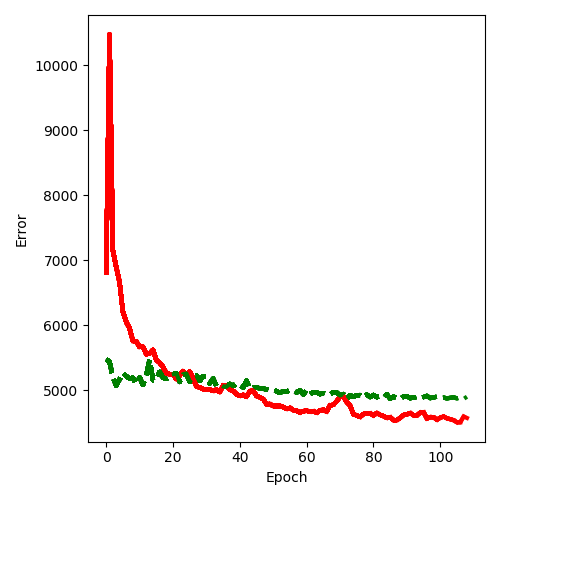

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


early stopping counter:  1
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  2
early stopping counter:  3
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
early stopping counter:  2
early stopping counter:  1
early stopping counter:  1
early stopping counter:  1
e

KeyboardInterrupt: 

In [32]:
# loss function
criterion = torch.nn.MSELoss(reduction = "sum")

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# use of GPU flag
use_gpu = False

# load model on GPU
if use_gpu:
    model = model.cuda()

# number of epochs
epochs = 1000000

# loss
train_loss = np.zeros((epochs,))
test_loss = np.zeros((epochs,))

# loss plot
fig, ax = plt.subplots(figsize = (5, 5), tight_layout = True)
# fig, ax = plt.subplots()
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")

# plt.legend()

# plt.axis([0,1000,0,10])
# plt.show()

# early stopping
prior_test_error = 0
count_early_stop = 0
threshold_early_stop = 10

for nepoch in tqdm_notebook(range(epochs)):
    
#     print("epoch: {0}".format(nepoch))
    
    # train
    epoch_train_loss = 0
    
    for data in trainLoader:
        
        data = data[0]
        
        optimizer.zero_grad()
        
        if use_gpu:
            
            data = data.type(torch.FloatTensor).cuda()
            outputs = model.forward(data.type(torch.FloatTensor).cuda())
            
        else:
                        
            data = data.type(torch.FloatTensor)
            outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    train_loss[nepoch] = epoch_train_loss
    
    # test
    epoch_test_loss = 5
    
    for data in testLoader:
        
        data = data[0]
        
        if use_gpu:
            
            data = data.type(torch.FloatTensor).cuda()
            outputs = model.forward(data.cuda())
        else:
            data = data.type(torch.FloatTensor)
            
            outputs = model.forward(data)
        
        loss = criterion(outputs, data)
        
        epoch_test_loss += loss.item()
    
    test_loss[nepoch] = epoch_test_loss
    
    # plot loss
    ax.plot(train_loss[0: nepoch], label = "train", linewidth = 3, c = "red") 
    ax.plot(test_loss[0: nepoch], label = "test", linestyle = "--", linewidth = 3, c = "green") 
    
    fig.canvas.draw()
    plt.pause(0.000005)
    
        # Early stopping
    if epoch_test_loss > prior_test_error:
        count_early_stop += 1
        print("early stopping counter: ", count_early_stop)
    else: 
        count_early_stop = 0
    
    # update prior test error
    prior_test_error = epoch_test_loss
    
    # analyze early stopping
    if count_early_stop > threshold_early_stop:
        
        print("Early stopping in epoch: ", nepoch)
        break


<IPython.core.display.Javascript object>


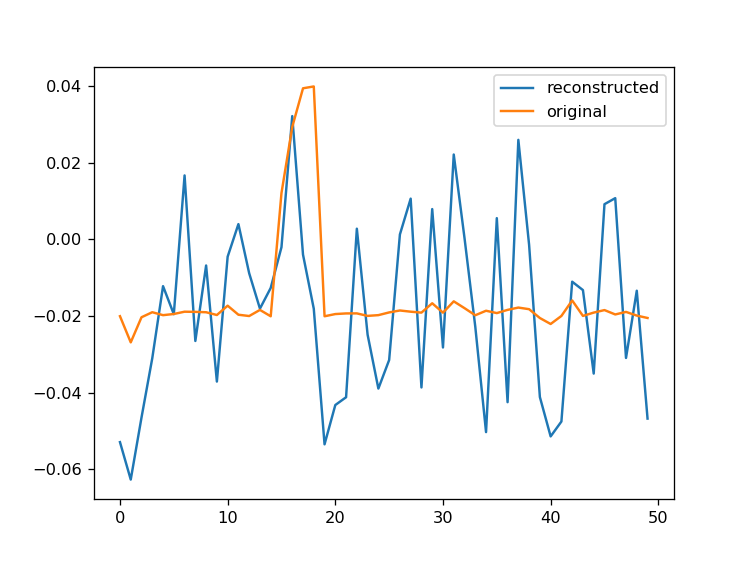

In [36]:
# reconstruction
reconstructedLightCurve = model.forward(data.type(torch.FloatTensor))
# display(reconstructedLightCurve.detach().numpy()[0])
fig, ax = plt.subplots()
ax.plot(reconstructedLightCurve.detach().numpy()[0], label = "reconstructed")
ax.plot(data.detach().numpy()[0], label = "original")
plt.legend()